In [1]:
#Se vincula una cuenta de google drive para importar los dataset

# Mount your google drive in google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#2. Data Understanding

Number of Instances: 614 (train), 5 (test)

Number of Attributes: 8 plus class

Columns Description:

1.   Number of times pregnant
2.   Plasma glucose concentration 2 hours in an oral glucose tolerance test
3.   Diastolic blood pressure (mm Hg)
4.   Triceps skin fold thickness (mm)
5.   2-Hour serum insulin (mu U/ml)
6.   Body mass index (weight in kg/(height in m)^2)
7.   Diabetes pedigree function
8.   Age (years)
9.   Class variable (0 or 1)

Class Distribution: (class value 1 is interpreted as "tested positive for diabetes")

In [2]:
import pandas as pd

In [3]:
#import train and test splits

df_train = pd.read_csv("/content/drive/MyDrive/parcial2/train_diabetes.csv")
df_test = pd.read_csv("/content/drive/MyDrive/parcial2/test_diabetes.csv")

In [4]:
df_train.head()

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
0,316,2,112,68,22,94,34.1,0.315,26,0
1,25,11,143,94,33,146,36.6,0.254,51,1
2,710,2,93,64,32,160,38.0,0.674,23,1
3,658,1,120,80,48,200,38.9,1.162,41,0
4,542,3,128,72,25,190,32.4,0.549,27,1


In [5]:
#evaluating the equality of the data
df_train.info()

#There are not missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   p_id                   614 non-null    int64  
 1   no_times_pregnant      614 non-null    int64  
 2   glucose_concentration  614 non-null    int64  
 3   blood_pressure         614 non-null    int64  
 4   skin_fold_thickness    614 non-null    int64  
 5   serum_insulin          614 non-null    int64  
 6   bmi                    614 non-null    float64
 7   diabetes pedigree      614 non-null    float64
 8   age                    614 non-null    int64  
 9   diabetes               614 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 48.1 KB


In [6]:
#We can also check the uniqueness of each column in the DataFrame

for col in df_train.columns:
  print(col + ": ", len(df_train[col].unique()))

p_id:  614
no_times_pregnant:  17
glucose_concentration:  127
blood_pressure:  44
skin_fold_thickness:  50
serum_insulin:  163
bmi:  237
diabetes pedigree:  439
age:  52
diabetes:  2


In [7]:
#Check statistics of the data

df_train.describe()

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,385.773616,3.853420,120.542345,68.765472,20.244300,79.355049,31.909935,0.466342,33.325733,0.348534
std,223.603024,3.358126,31.252286,19.914836,15.886083,117.709950,8.007699,0.331090,11.929569,0.476895
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,191.250000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.240250,24.000000,0.000000
50%,387.000000,3.000000,117.000000,72.000000,23.000000,17.000000,32.000000,0.361000,29.000000,0.000000
75%,572.750000,6.000000,139.000000,80.000000,32.000000,126.000000,36.600000,0.613500,41.000000,1.000000
max,768.000000,17.000000,197.000000,114.000000,63.000000,846.000000,59.400000,2.420000,81.000000,1.000000


In [8]:
df_train.dtypes

p_id                       int64
no_times_pregnant          int64
glucose_concentration      int64
blood_pressure             int64
skin_fold_thickness        int64
serum_insulin              int64
bmi                      float64
diabetes pedigree        float64
age                        int64
diabetes                   int64
dtype: object

In [9]:
#Classs distribution

df_train['diabetes'].value_counts()

0    400
1    214
Name: diabetes, dtype: int64

##Visualize Data

In [10]:
from matplotlib import pyplot as plt
import seaborn as sns

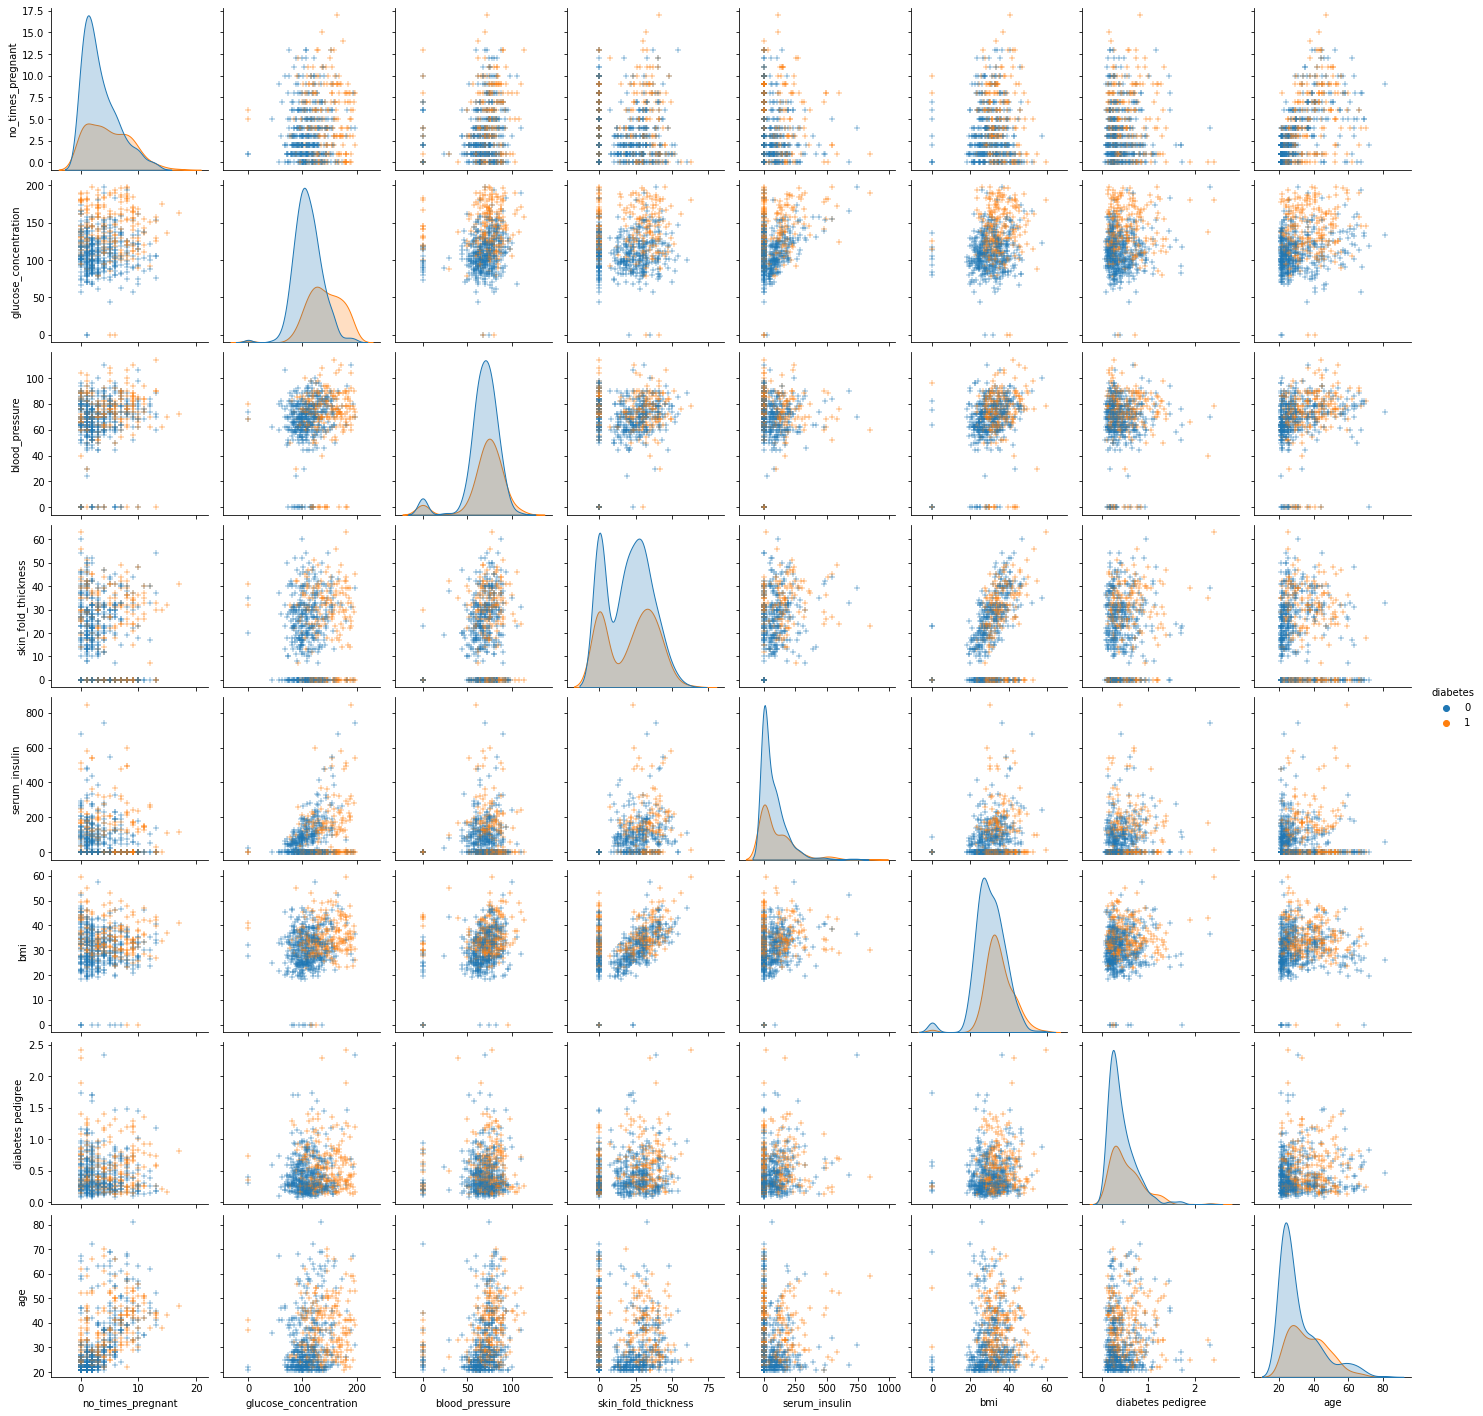

In [12]:
tmp = df_train.drop('p_id', axis=1)
g = sns.pairplot(tmp, hue='diabetes', markers='+')
plt.show()

**Assumption #2 "Y is distributed normally at each value of X" is true for this data ✔️**

In [13]:
list(df_train.keys())

['p_id',
 'no_times_pregnant',
 'glucose_concentration',
 'blood_pressure',
 'skin_fold_thickness',
 'serum_insulin',
 'bmi',
 'diabetes pedigree',
 'age',
 'diabetes']

In [14]:
#Converts 0, 1 diabetes classes to str for better visualization
df_temp = df_train.copy()
df_temp['diabetes'] = df_temp['diabetes'].apply(str)

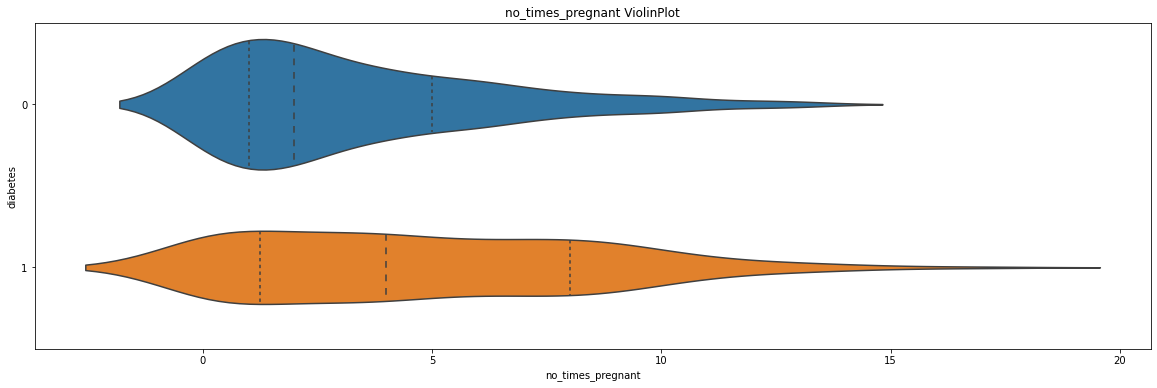

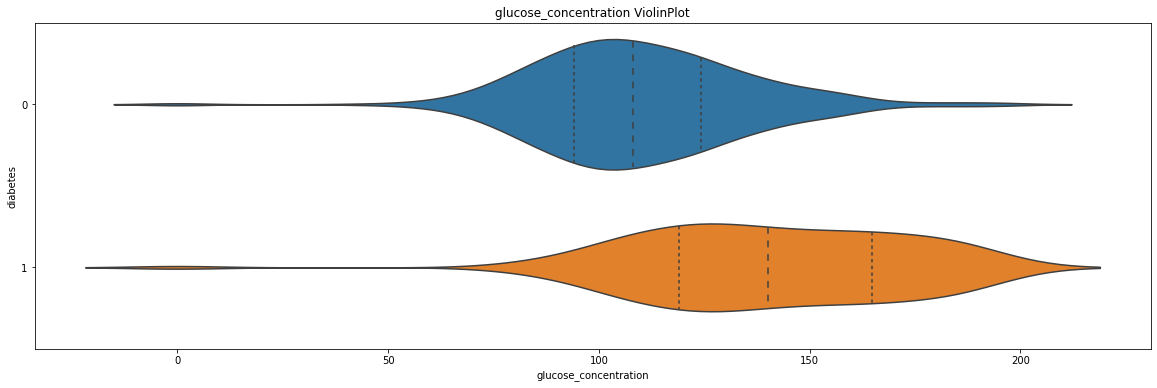

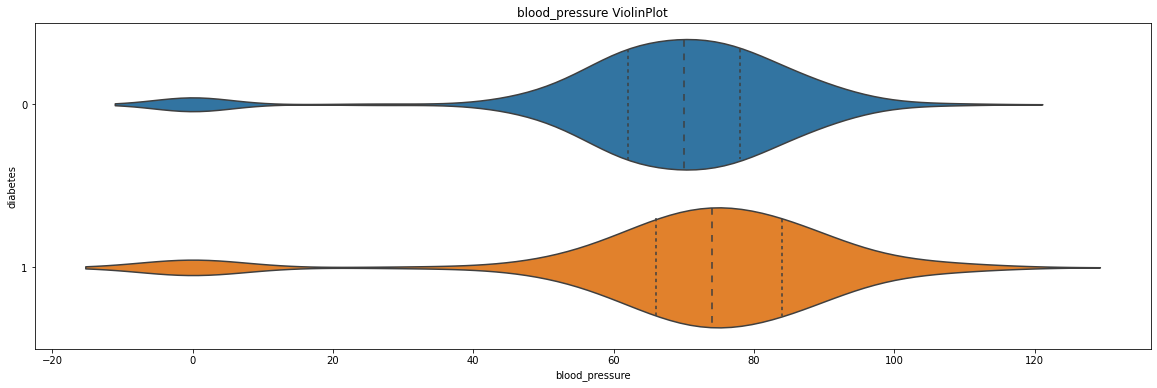

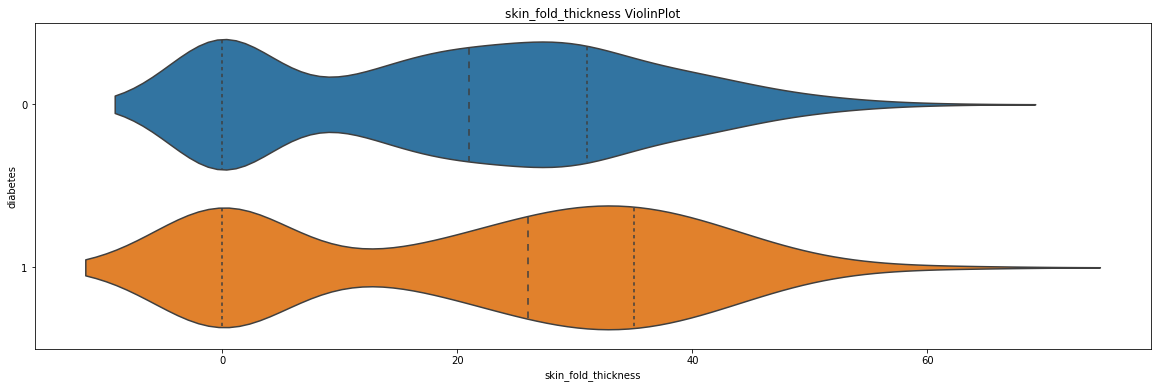

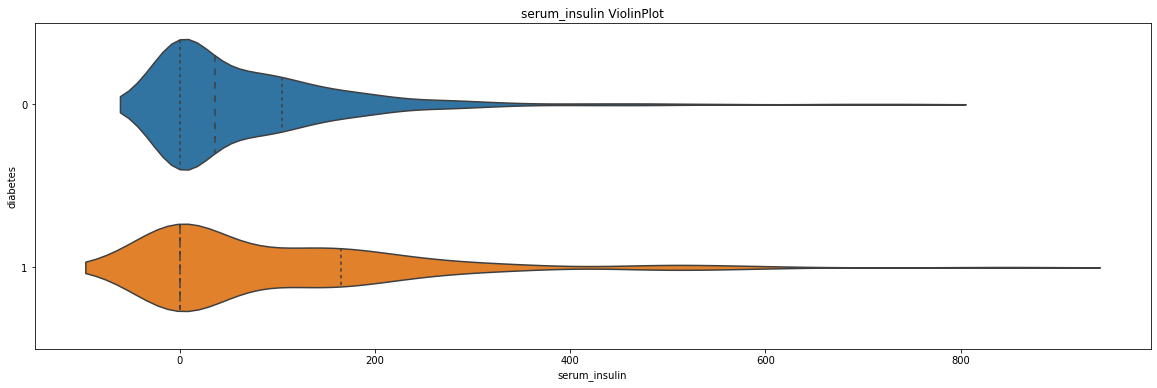

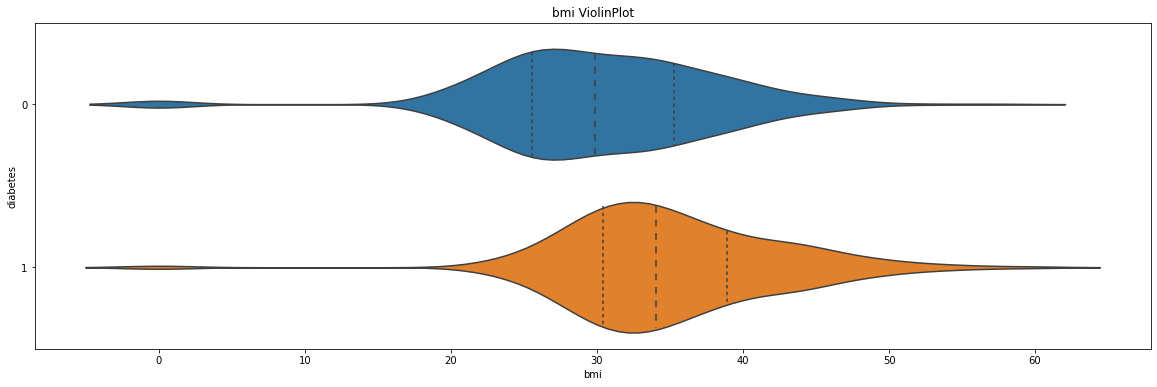

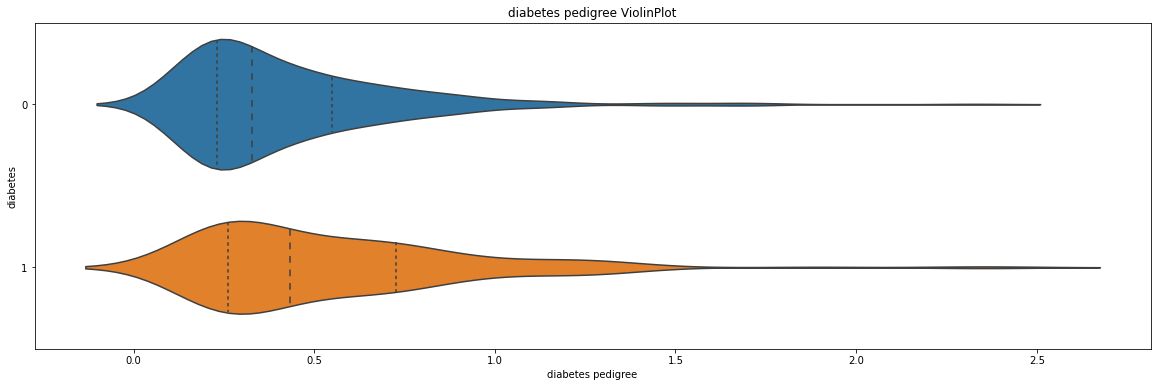

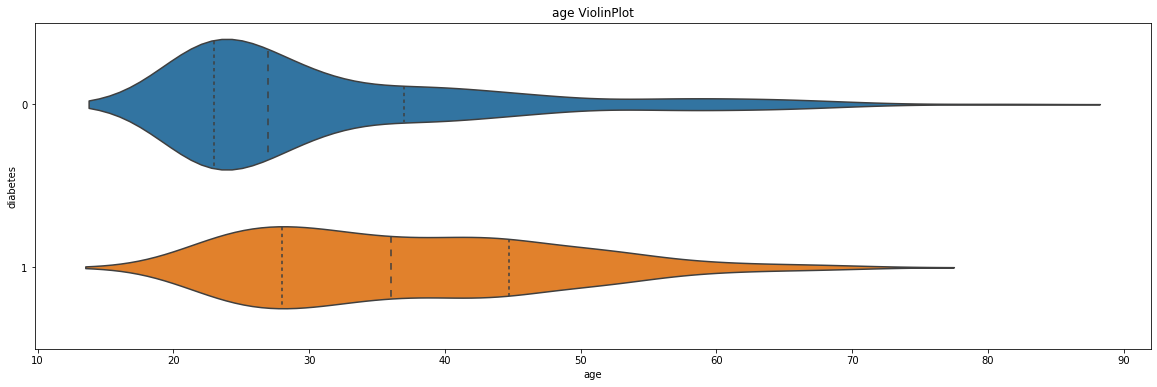

In [15]:
#Violin plot
X_col_names = list(df_train.keys())[1:-1]

for col_name in range(len(X_col_names)):
  plt.figure(figsize=(20,6))
  sns.violinplot(x=X_col_names[col_name], y='diabetes', data=df_temp, inner='quartile').set_title(X_col_names[col_name]+" ViolinPlot")
  plt.show()

It does not seems that any attribute has a strong influence on the determination of diabetes class.

*   **Assumption #3 "The variance of Y at every value of X is the same (homogeneity of variances)" seems to be true for this data ✔️**
*   **Assumption #4 "The observations are independent" is true for this data ✔️**



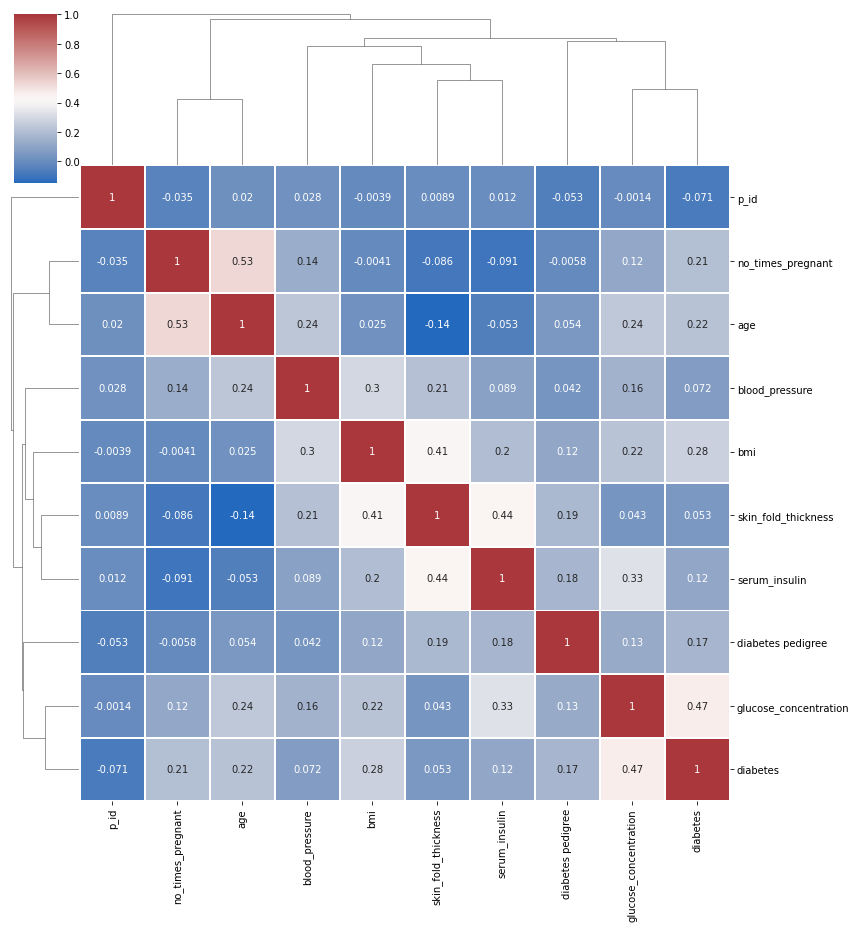

In [18]:
#Correlation between features

sns.clustermap(df_train.corr(), cmap = "vlag", dendrogram_ratio = (0.1, 0.2), annot = True, linewidths = .8, figsize = (12,13))
plt.show()

#3. Data Preparation

In [20]:
#Check data types

df_train.dtypes

p_id                       int64
no_times_pregnant          int64
glucose_concentration      int64
blood_pressure             int64
skin_fold_thickness        int64
serum_insulin              int64
bmi                      float64
diabetes pedigree        float64
age                        int64
diabetes                   int64
dtype: object

In [21]:
df_test.dtypes

p_id                       int64
no_times_pregnant          int64
glucose_concentration      int64
blood_pressure             int64
skin_fold_thickness        int64
serum_insulin              int64
bmi                      float64
diabetes pedigree        float64
age                        int64
dtype: object

Both dataframes has correct dtype for values. There are not missing values.

Dataset does not contain categorical features, son one-hot encoding is not necessary.

#4. Modeling

Note: Cells commented must be ignored.

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [177]:
#Define independent and dependent variable:

X = df_train.drop(['diabetes', 'p_id'], axis=1)
y = df_train['diabetes']

##Scaling Features

Scaling numeric features ensures that no particular feature has a disproportionate impact on the model's loss. Optimization algorithms also work better in practice with smaller numbers.

In [194]:
X.describe()

,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,3.853420,120.542345,68.765472,20.244300,79.355049,31.909935,0.466342,33.325733
std,3.358126,31.252286,19.914836,15.886083,117.709950,8.007699,0.331090,11.929569
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.240250,24.000000
50%,3.000000,117.000000,72.000000,23.000000,17.000000,32.000000,0.361000,29.000000
75%,6.000000,139.000000,80.000000,32.000000,126.000000,36.600000,0.613500,41.000000
max,17.000000,197.000000,114.000000,63.000000,846.000000,59.400000,2.420000,81.000000


##Comparing

In [195]:
# Scale to [0, 1]
max_ = X.max(axis=0)
min_ = X.min(axis=0)
X = (X - min_) / (max_ - min_)

In [196]:
X.describe()

,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.226672,0.611890,0.603206,0.321338,0.093800,0.537204,0.165816,0.205429
std,0.197537,0.158641,0.174692,0.252160,0.139137,0.134810,0.141371,0.198826
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.502538,0.543860,0.000000,0.000000,0.459596,0.069278,0.050000
50%,0.176471,0.593909,0.631579,0.365079,0.020095,0.538721,0.120837,0.133333
75%,0.352941,0.705584,0.701754,0.507937,0.148936,0.616162,0.228651,0.333333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##Import Dependencies

In [214]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

from sklearn.model_selection import cross_val_score

from sklearn.metrics import mean_squared_error, mean_squared_log_error, accuracy_score

In [256]:
linreg_pipeline = Pipeline(steps=[('model', LinearRegression())])

In [257]:
logreg_pipeline = Pipeline(steps=[('model', LogisticRegression(solver='liblinear'))])

In [278]:
rf_pipeline = Pipeline(steps=[('model', RandomForestClassifier(n_estimators=200, random_state=64))])

#5. Evaluating Models (k-Fold Cross Validation)

## Mean Squared Error (MSE)

Linear Regression

In [270]:
# Multiply by -1 since sklearn calculates *negative* MSE
scores = -1 * cross_val_score(linreg_pipeline, X, y,
                              cv=10,
                              scoring='neg_mean_squared_error')

print("MSE scores:\n", scores)
print("\n Average MSE score (across experiments):")
print(scores.mean())

MSE scores:
 [0.1582769  0.15118501 0.13235929 0.17008284 0.17367299 0.16595435
 0.17022733 0.161198   0.18887061 0.18736717]

 Average MSE score (across experiments):
0.16591944838299763


Logistic Regresion

In [260]:
# Multiply by -1 since sklearn calculates *negative* MSE
scores = -1 * cross_val_score(logreg_pipeline, X, y,
                              cv=10,
                              scoring='neg_mean_squared_log_error')

print("MLSE scores:\n", scores)
print("\n Average MLSE score (across experiments):")
print(scores.mean())

MLSE scores:
 [0.10074015 0.10074015 0.08524166 0.12398787 0.12602046 0.08663907
 0.14177302 0.11814418 0.13389674 0.10239163]

 Average MLSE score (across experiments):
0.11195749369807266


Random Forest for classification

In [261]:
# Multiply by -1 since sklearn calculates *negative* MSE
scores = -1 * cross_val_score(rf_pipeline, X, y,
                              cv=10,
                              scoring='neg_mean_squared_log_error')

print("MLSE scores:\n", scores)
print("\n Average MLSE score (across experiments):")
print(scores.mean())

MLSE scores:
 [0.11623863 0.12398787 0.07749242 0.10074015 0.10239163 0.09451535
 0.10239163 0.09451535 0.12602046 0.11814418]

 Average MLSE score (across experiments):
0.10564376688904713


The problem addressed is of the classification type. Therefore, a linear regression is not the right approach. To solve classification problems, models such as Logistic Regression or Random Forest for Classification are used. We will now compare the last two with the metrics corresponding to classification problems.

##Accuracy

Logistic Regresion

In [275]:
scores = cross_val_score(logreg_pipeline, X, y,
                              cv=10,
                              scoring='accuracy')

print("Accuracy scores:\n", scores)
print("\n Average Accuracy score (across experiments):")
print(scores.mean())

Accuracy scores:
 [0.79032258 0.79032258 0.82258065 0.74193548 0.73770492 0.81967213
 0.70491803 0.75409836 0.72131148 0.78688525]

 Average Accuracy score (across experiments):
0.7669751454257007


Random Forest for classification

In [279]:
scores = cross_val_score(rf_pipeline, X, y,
                              cv=10,
                              scoring='accuracy')

print("Accuracy scores:\n", scores)
print("\n Average Accuracy score (across experiments):")
print(scores.mean())

Accuracy scores:
 [0.74193548 0.74193548 0.83870968 0.80645161 0.7704918  0.80327869
 0.78688525 0.83606557 0.73770492 0.78688525]

 Average Accuracy score (across experiments):
0.7850343733474352


##Logaritmic Loss

Logistic Regression

In [264]:
scores = -1 * cross_val_score(logreg_pipeline, X, y,
                              cv=10,
                              scoring='neg_log_loss')

print("Logarithmic Loss scores:\n", scores)
print("\n Average Logarithmic Loss score (across experiments):")
print(scores.mean())

Logarithmic Loss scores:
 [0.53029444 0.49533375 0.48809391 0.52422738 0.55542863 0.44782837
 0.52346336 0.50469808 0.60778733 0.4723959 ]

 Average Logarithmic Loss score (across experiments):
0.5149551168821109


Random Forest for classification

In [265]:
scores = -1 * cross_val_score(rf_pipeline, X, y,
                              cv=10,
                              scoring='neg_log_loss')

print("Logarithmic Loss scores:\n", scores)
print("\n Average Logarithmic Loss score (across experiments):")
print(scores.mean())

Logarithmic Loss scores:
 [0.53152699 0.51647937 0.44047989 0.45198319 0.49193008 0.4644009
 0.46463281 0.40011293 0.52648169 0.4149656 ]

 Average Logarithmic Loss score (across experiments):
0.47029934461234896


##F1 Score

Logistic Regression

In [266]:
scores = cross_val_score(logreg_pipeline, X, y,
                              cv=10,
                              scoring='f1')

print("F1 scores:\n", scores)
print("\n Average F1 score (across experiments):")
print(scores.mean())

F1 scores:
 [0.62857143 0.60606061 0.7027027  0.55555556 0.5        0.73170732
 0.4        0.57142857 0.51428571 0.60606061]

 Average F1 score (across experiments):
0.5816372501738356


Random Forest for classification

In [267]:
scores = cross_val_score(rf_pipeline, X, y,
                              cv=10,
                              scoring='f1')

print("F1 scores:\n", scores)
print("\n Average F1 score (across experiments):")
print(scores.mean())

F1 scores:
 [0.63414634 0.52941176 0.73684211 0.66666667 0.66666667 0.72727273
 0.62857143 0.7        0.6        0.59459459]

 Average F1 score (across experiments):
0.6484172295204538


**Random forest outperform logistic regresion with default hyperparameters.**

# 6. Fitting and Evaluating Models with df_test

In [305]:
from sklearn.metrics import confusion_matrix

In [295]:
X_full = df_train.drop(['diabetes', 'p_id'], axis=1)
y_full = df_train['diabetes']

# Scale to [0, 1]
max_ = df_train.drop(['diabetes', 'p_id'], axis=1).max(axis=0)
min_ = df_train.drop(['diabetes', 'p_id'], axis=1).min(axis=0)
X_full = (X_full - min_) / (max_ - min_)

#split data into train and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_full, y_full, test_size=0.3, random_state=64)

In [296]:
print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)

(429, 8) (185, 8) (429,) (185,)


In [301]:
X_test = df_test.drop('p_id', axis=1)
X_test

,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age
0,2,112,68,22,94,34.1,0.315,26
1,11,143,94,33,146,36.6,0.254,51
2,2,93,64,32,160,38.0,0.674,23
3,1,120,80,48,200,38.9,1.162,41
4,3,128,72,25,190,32.4,0.549,27


In [302]:
# Scale to [0, 1]
max_ = df_train.drop(['diabetes', 'p_id'], axis=1).max(axis=0)
min_ = df_train.drop(['diabetes', 'p_id'], axis=1).min(axis=0)
X_test = (X_test - min_) / (max_ - min_)

In [312]:
#Function to compute accuracy and confusion matrix for a given inputs and target

def predict_and_plot(inputs, targets, model, name=''):
    preds = model.predict(inputs)
    
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));

## Logistic Regression

In [324]:
#Fitting
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

LogisticRegression()

Accuracy: 78.32%


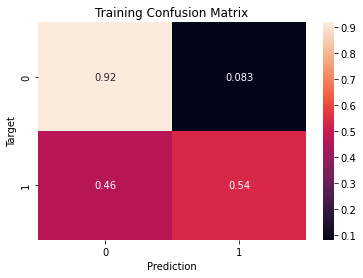

In [325]:
#Predictions and Evaluation (Training set)
predict_and_plot(X_train, y_train, logreg_model, 'Training')

Accuracy: 78.38%


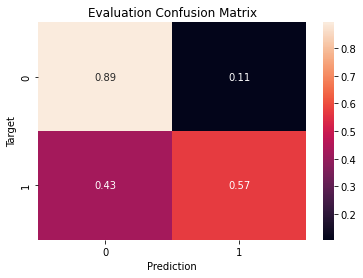

In [326]:
#Predictions and Evaluation (Evaluation set)
predict_and_plot(X_valid, y_valid, logreg_model, 'Evaluation')

In [327]:
#Predictions on df_test
logreg_model.predict(X_test)

array([0, 1, 0, 0, 0])

## RandomForest Classifier

In [373]:
#Fitting
rf_model = RandomForestClassifier(n_estimators=10, random_state=64)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=64)

Accuracy: 99.07%


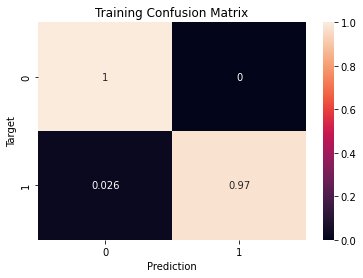

In [374]:
#Predictions and Evaluation (Training set)
predict_and_plot(X_train, y_train, rf_model, 'Training')

Accuracy: 78.38%


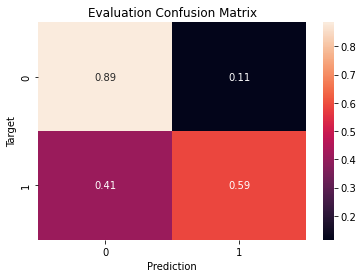

In [375]:
#Predictions and Evaluation (Evaluation set)
predict_and_plot(X_valid, y_valid, rf_model, 'Evaluation')

In [376]:
#Predictions on df_test
rf_model.predict(X_test)

array([0, 1, 0, 0, 1])

# 7. Conclusion

None of the trained models exceeded an accuracy of 80%. This may be due to the small size of the dataset. It is also necessary to have knowledge of the hyperparameters of each model to choose the ones that improve the performance for the problem.